# Cleaning and Feature Engineering

##### We had to do extensive data processing in order to clean and prepare the data because it came from several sources in various formats. After that, the data is appropriate for creating the machine learning model. 

📌 Importing the data

In [1]:
import pandas as pd

# Importing the first dataset
inputs = pd.read_excel('RAW INPUT DATA/GUNDLUPET_input.xlsx')

# Importing the second dataset
output = pd.read_excel('ALL_output.xlsx')


📌 Selecting data based on the location choosen from the output dataset

In [2]:
output_cleaned = output[4:5]

 #### Cleaning the output dataset 💡

📌 Transpose the data

In [3]:
output_cleaned = output_cleaned.transpose()
output_cleaned

,4
S.No,5
State,Karnataka
DISTRICT,Chamarajanagar
TALUK,GUNDLUPET
LOCATION,Gundlupet
LAT,11.8
LON,76.6861
AQUIFER,Borewell
JAN 2014,42.08
MAY 2014,47.06


📌 Remove unwanted data

In [4]:
output_cleaned = output_cleaned[8:32]

📌 Renaming column

In [5]:
output_cleaned = output_cleaned.rename(columns = {4:'Ground_water_level'})
output_cleaned

,Ground_water_level
JAN 2014,42.08
MAY 2014,47.06
AUG 2014,45.65
NOV 2014,35.81
JAN 2015,38.23
MAY 2015,37.5
AUG 2015,39.7
NOV 2015,21.5
JAN 2016,56.8
MAY 2016,41.78


📌 Using the average of neighbouring data items to fill in missing data

In [6]:
output_cleaned[18:19] = 38.05

📌 Changing data type to Float

In [7]:
output_cleaned.dtypes

Ground_water_level    object
dtype: object

In [8]:
output_cleaned['Ground_water_level'] = output_cleaned['Ground_water_level'].astype(float)

📌 Final cleaned output dataset

In [9]:
output_cleaned

,Ground_water_level
JAN 2014,42.08
MAY 2014,47.06
AUG 2014,45.65
NOV 2014,35.81
JAN 2015,38.23
MAY 2015,37.50
AUG 2015,39.70
NOV 2015,21.50
JAN 2016,56.80
MAY 2016,41.78


 #### Cleaning the Input dataset 💡

📌 Deleting unneccessary data elements from input dataset

In [10]:
inputs = inputs[13:]
inputs.reset_index(drop=True, inplace=True)

📌 Reformatting dataset into separate columns

In [11]:
inputs['-BEGIN HEADER-']

0         LAT,LON,YEAR,MO,DY,PRECTOT,RH2M,T2M,T2MDEW,WS10M
1        11.80901,76.68701,1990,01,01,    0.06,   69.45...
2        11.80901,76.68701,1990,01,02,    0.03,   69.35...
3        11.80901,76.68701,1990,01,03,    0.00,   63.83...
4        11.80901,76.68701,1990,01,04,    0.00,   62.42...
                               ...                        
11320    11.80901,76.68701,2020,12,28,    0.00,   66.48...
11321    11.80901,76.68701,2020,12,29,    0.21,   69.52...
11322    11.80901,76.68701,2020,12,30,    2.10,   79.69...
11323    11.80901,76.68701,2020,12,31,    5.13,   82.81...
11324    11.80901,76.68701,2021,01,01,    0.50,   72.23...
Name: -BEGIN HEADER-, Length: 11325, dtype: object

In [12]:
inputs_cleaned = inputs['-BEGIN HEADER-'].str.split(',', expand=True)
inputs_cleaned.columns = inputs_cleaned.iloc[0]
inputs_cleaned.reset_index(drop=True, inplace=True)
inputs_cleaned = inputs_cleaned.drop(0)
inputs_cleaned.reset_index(drop=True, inplace=True)

In [13]:
inputs_cleaned.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,RH2M,T2M,T2MDEW,WS10M
0,11.80901,76.68701,1990,01,01,0.06,69.45,23.92,17.97,1.48
1,11.80901,76.68701,1990,01,02,0.03,69.35,23.20,17.25,2.80
2,11.80901,76.68701,1990,01,03,0.00,63.83,22.84,15.60,3.01
3,11.80901,76.68701,1990,01,04,0.00,62.42,22.22,14.62,3.82
4,11.80901,76.68701,1990,01,05,0.00,59.07,20.68,12.26,3.43


📌 Renaming Columns

In [14]:
inputs_cleaned = inputs_cleaned.rename(columns = {'PRECTOT':'Precipitation',
                                                  'RH2M':'Humidity',
                                                  'T2M':'Temperature',
                                                  })

inputs_cleaned

,LAT,LON,YEAR,MO,DY,Precipitation,Humidity,Temperature,T2MDEW,WS10M
0,11.80901,76.68701,1990,01,01,0.06,69.45,23.92,17.97,1.48
1,11.80901,76.68701,1990,01,02,0.03,69.35,23.20,17.25,2.80
2,11.80901,76.68701,1990,01,03,0.00,63.83,22.84,15.60,3.01
3,11.80901,76.68701,1990,01,04,0.00,62.42,22.22,14.62,3.82
4,11.80901,76.68701,1990,01,05,0.00,59.07,20.68,12.26,3.43
...,...,...,...,...,...,...,...,...,...,...
11319,11.80901,76.68701,2020,12,28,0.00,66.48,20.68,14.31,1.77
11320,11.80901,76.68701,2020,12,29,0.21,69.52,21.40,15.70,2.24
11321,11.80901,76.68701,2020,12,30,2.10,79.69,22.44,18.81,2.78
11322,11.80901,76.68701,2020,12,31,5.13,82.81,22.15,19.12,3.67


📌 Removing unwanted columns

In [15]:
inputs_cleaned.drop(['LAT','LON','T2MDEW', 'WS10M'], axis = 1, inplace = True) 
inputs_cleaned.head()

,YEAR,MO,DY,Precipitation,Humidity,Temperature
0,1990,01,01,0.06,69.45,23.92
1,1990,01,02,0.03,69.35,23.20
2,1990,01,03,0.00,63.83,22.84
3,1990,01,04,0.00,62.42,22.22
4,1990,01,05,0.00,59.07,20.68


📌 Changing column data types into Integer and Float

In [16]:
inputs_cleaned['YEAR'] = inputs_cleaned['YEAR'].astype(int)
inputs_cleaned['MO'] = inputs_cleaned['MO'].astype(int)
inputs_cleaned['DY'] = inputs_cleaned['DY'].astype(int)
inputs_cleaned['Precipitation'] = inputs_cleaned['Precipitation'].astype(float)
inputs_cleaned['Humidity'] = inputs_cleaned['Humidity'].astype(float)
inputs_cleaned['Temperature'] = inputs_cleaned['Temperature'].astype(float)

📌 Filtering input data based on Date

In [17]:
inputs_cleaned = inputs_cleaned[inputs_cleaned['YEAR'] >= 2014]
inputs_cleaned = inputs_cleaned[inputs_cleaned['YEAR'] <= 2019]
inputs_cleaned.reset_index(drop=True, inplace=True)
inputs_cleaned.drop(inputs_cleaned.tail(1).index,inplace=True)
inputs_cleaned

,YEAR,MO,DY,Precipitation,Humidity,Temperature
0,2014,1,1,0.00,64.87,20.63
1,2014,1,2,0.00,63.15,21.04
2,2014,1,3,0.00,66.60,21.13
3,2014,1,4,0.00,62.14,21.74
4,2014,1,5,0.00,55.47,21.55
...,...,...,...,...,...,...
2185,2019,12,26,0.18,80.45,23.11
2186,2019,12,27,0.03,76.98,22.93
2187,2019,12,28,0.02,76.59,22.02
2188,2019,12,29,0.01,77.61,22.07


📌 Merging 'Year', 'MO', 'DY' into 'Date' Column

In [18]:
inputs_cleaned['Date'] = pd.to_datetime(inputs_cleaned[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1))
inputs_cleaned = inputs_cleaned.drop(columns=['YEAR', 'MO', 'DY'])
date_column = inputs_cleaned.pop('Date')
inputs_cleaned.insert(0, 'Date', date_column)
inputs_cleaned

,Date,Precipitation,Humidity,Temperature
0,2014-01-01,0.00,64.87,20.63
1,2014-01-02,0.00,63.15,21.04
2,2014-01-03,0.00,66.60,21.13
3,2014-01-04,0.00,62.14,21.74
4,2014-01-05,0.00,55.47,21.55
...,...,...,...,...
2185,2019-12-26,0.18,80.45,23.11
2186,2019-12-27,0.03,76.98,22.93
2187,2019-12-28,0.02,76.59,22.02
2188,2019-12-29,0.01,77.61,22.07


 #### Merging input and output Dataset 💡

📌 Adding 'Date' column in output data

In [19]:
output_cleaned['Date'] = pd.to_datetime(output_cleaned.index + ' 1', format='%b %Y %d')
output_cleaned

,Ground_water_level,Date
JAN 2014,42.08,2014-01-01
MAY 2014,47.06,2014-05-01
AUG 2014,45.65,2014-08-01
NOV 2014,35.81,2014-11-01
JAN 2015,38.23,2015-01-01
MAY 2015,37.50,2015-05-01
AUG 2015,39.70,2015-08-01
NOV 2015,21.50,2015-11-01
JAN 2016,56.80,2016-01-01
MAY 2016,41.78,2016-05-01


📌 Merging input and output based on common 'Date' column

In [20]:
dataset = pd.merge(inputs_cleaned, output_cleaned, on='Date', how='outer')
dataset

,Date,Precipitation,Humidity,Temperature,Ground_water_level
0,2014-01-01,0.00,64.87,20.63,42.08
1,2014-01-02,0.00,63.15,21.04,NaN
2,2014-01-03,0.00,66.60,21.13,NaN
3,2014-01-04,0.00,62.14,21.74,NaN
4,2014-01-05,0.00,55.47,21.55,NaN
...,...,...,...,...,...
2185,2019-12-26,0.18,80.45,23.11,NaN
2186,2019-12-27,0.03,76.98,22.93,NaN
2187,2019-12-28,0.02,76.59,22.02,NaN
2188,2019-12-29,0.01,77.61,22.07,NaN


📌 Filling NaN 'Ground_water_level' values by Interpolation

In [21]:
from scipy.interpolate import interp1d

column_to_interpolate = dataset['Ground_water_level']
x = column_to_interpolate.dropna().index
y = column_to_interpolate.dropna().values
f = interp1d(x, y, bounds_error=False, fill_value='extrapolate')
interpolated_values = f(column_to_interpolate.index)
dataset_interpolated = dataset
dataset_interpolated['Ground_water_level'] = interpolated_values

dataset_interpolated

,Date,Precipitation,Humidity,Temperature,Ground_water_level
0,2014-01-01,0.00,64.87,20.63,42.080000
1,2014-01-02,0.00,63.15,21.04,42.121500
2,2014-01-03,0.00,66.60,21.13,42.163000
3,2014-01-04,0.00,62.14,21.74,42.204500
4,2014-01-05,0.00,55.47,21.55,42.246000
...,...,...,...,...,...
2185,2019-12-26,0.18,80.45,23.11,38.212391
2186,2019-12-27,0.03,76.98,22.93,38.210435
2187,2019-12-28,0.02,76.59,22.02,38.208478
2188,2019-12-29,0.01,77.61,22.07,38.206522


📌 Removing 'Date' column

In [22]:
dataset_interpolated.drop(['Date'], axis = 1, inplace = True) 

📌 Saving dataset as a CSV file

In [23]:
dataset_interpolated.to_csv('dataset_final',sep=',',index=False)

# Building ML Model

 #### Importing Dataset 💡

In [24]:
dataset_cleaned = pd.read_csv('dataset_final')

In [25]:
dataset_cleaned

,Precipitation,Humidity,Temperature,Ground_water_level
0,0.00,64.87,20.63,42.080000
1,0.00,63.15,21.04,42.121500
2,0.00,66.60,21.13,42.163000
3,0.00,62.14,21.74,42.204500
4,0.00,55.47,21.55,42.246000
...,...,...,...,...
2185,0.18,80.45,23.11,38.212391
2186,0.03,76.98,22.93,38.210435
2187,0.02,76.59,22.02,38.208478
2188,0.01,77.61,22.07,38.206522


 #### Analysis and ML Model building 💡

📌 Descriptive analysis of Dataset

In [26]:
# Summary Statistics
summary_stats = dataset_cleaned.describe()
print("Summary Statistics:")
summary_stats

Summary Statistics:


,Precipitation,Humidity,Temperature,Ground_water_level
count,2190.000000,2190.000000,2190.000000,2190.000000
mean,2.733913,68.055320,23.965265,41.546163
std,4.432195,16.115683,2.225863,5.376644
min,0.000000,23.560000,18.850000,21.500000
25%,0.010000,55.540000,22.490000,38.252011
50%,0.840000,73.245000,23.510000,41.211739
75%,3.570000,81.057500,25.097500,43.774572
max,53.520000,95.380000,30.830000,59.300000


📌 Data distribution analysis using Histogram

<Figure size 1200x600 with 0 Axes>

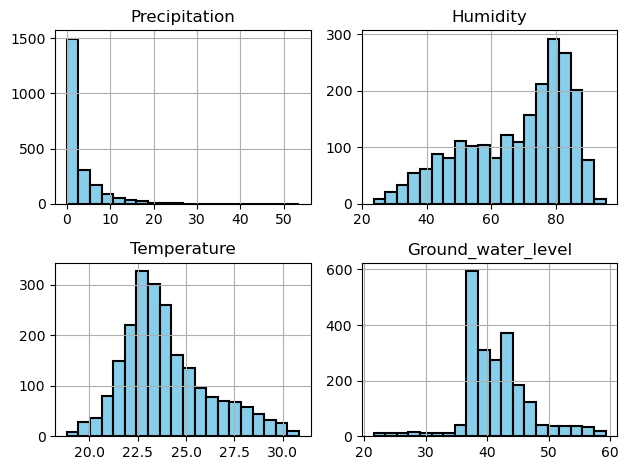

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
dataset_cleaned.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.5)
plt.tight_layout()
plt.show()

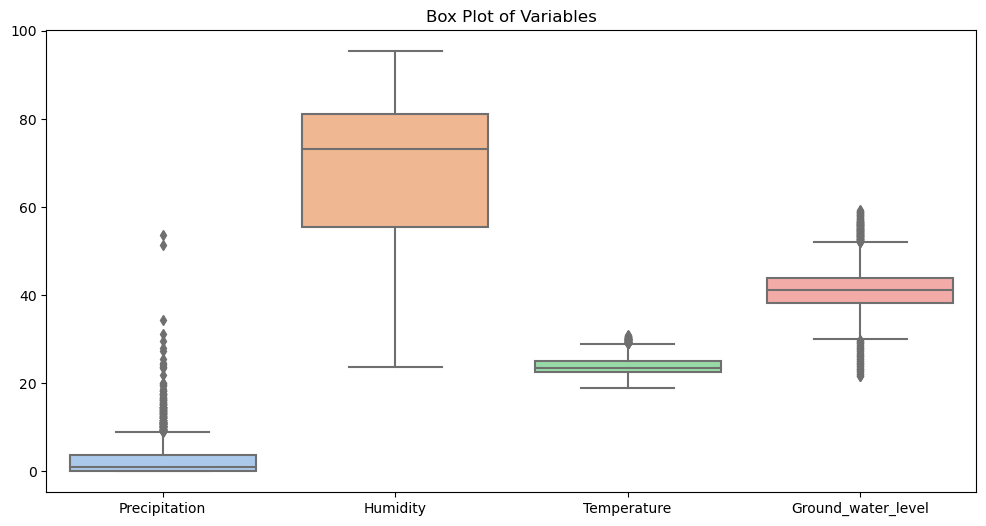

In [28]:
# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset_cleaned, palette='pastel')
plt.title('Box Plot of Variables')
plt.show()

📌 Correlation Analysis of features

In [29]:
correlation_matrix = dataset_cleaned.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    Precipitation  Humidity  Temperature  Ground_water_level
Precipitation            1.000000  0.483852    -0.119534           -0.041428
Humidity                 0.483852  1.000000    -0.483487           -0.171876
Temperature             -0.119534 -0.483487     1.000000            0.156699
Ground_water_level      -0.041428 -0.171876     0.156699            1.000000


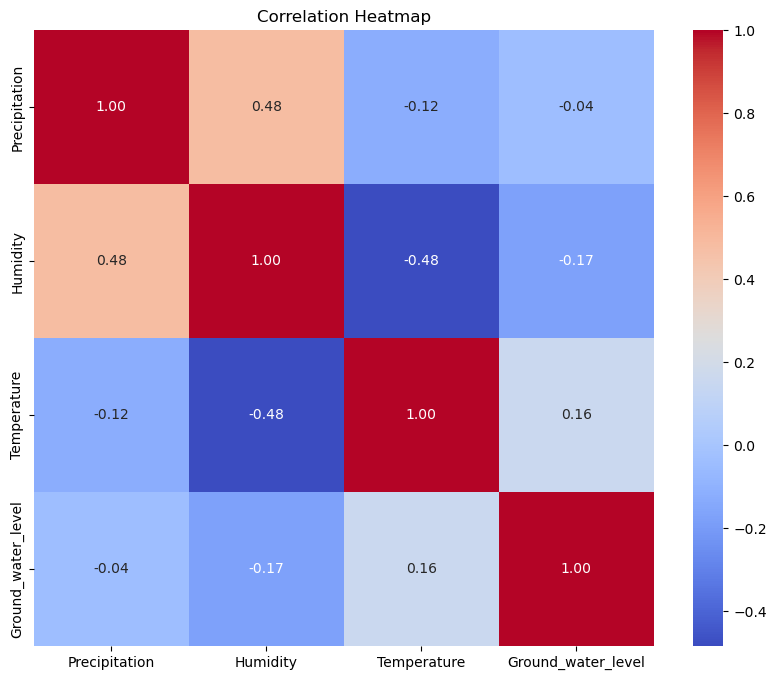

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

📌 Building and Testing ML Model(Random Forest Regression)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Splitting the data into input features (X) and target variable (y)
X = dataset_cleaned[['Precipitation', 'Humidity', 'Temperature']]  # Input features
y = dataset_cleaned['Ground_water_level']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Regressor model
model_rf = RandomForestRegressor(random_state=42)

# Training the model on the training data
model_rf.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_rf = model_rf.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error (MSE):", mse_rf)
print("Random Forest R-squared (R2):", r2_rf)

Random Forest Mean Squared Error (MSE): 30.4205857824931
Random Forest R-squared (R2): -0.0433574840286064


📌 Building and Testing ML Model(Support Vector Machine)


In [32]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Splitting the data into input features (X) and target variable (y)
X = dataset_cleaned[['Precipitation', 'Humidity', 'Temperature']]  # Input features
y = dataset_cleaned['Ground_water_level']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Support Vector Machine (SVM) regressor model
model_svm = make_pipeline(StandardScaler(), SVR())

# Training the model on the training data
model_svm.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_svm = model_svm.predict(X_test)

# Evaluating the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("SVM Mean Squared Error (MSE):", mse_svm)
print("SVM R-squared (R2):", r2_svm)


SVM Mean Squared Error (MSE): 29.339960803933636
SVM R-squared (R2): -0.0062944844246630716


📌 Building and Testing ML Model(Gradient Boosting Regression)

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

# Splitting the data into input features (X) and target variable (y)
X = dataset_cleaned[['Precipitation', 'Humidity', 'Temperature']]  # Input features
y = dataset_cleaned['Ground_water_level']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Regressor model
model = GradientBoostingRegressor(random_state=42)

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 27.97165500187426
R-squared (R2): 0.040635318611543125


📌 Saving model

In [40]:
import pickle

# File path to save the model
model_file_path = 'gradient_boosting_regressor_model.pkl'

# Pickle the model
with open(model_file_path, 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully.")


Model saved successfully.
